# Decision Trees
source: http://dataaspirant.com/2017/02/01/decision-tree-algorithm-python-with-scikit-learn/

#### Mushroom database

Download data from: http://archive.ics.uci.edu/ml/datasets/Mushroom

- Relevant Information:
    This data set includes descriptions of hypothetical samples
    corresponding to 23 species of gilled mushrooms in the Agaricus and
    Lepiota Family (pp. 500-525).  Each species is identified as
    definitely edible, definitely poisonous, or of unknown edibility and
    not recommended.  This latter class was combined with the poisonous
    one.  The Guide clearly states that there is no simple rule for
    determining the edibility of a mushroom; no rule like "leaflets
    three, let it be" for Poisonous Oak and Ivy.

- Number of Instances: 8124

- Number of Attributes: 22 (all nominally valued)

- Attribute Information: (classes: edible=e, poisonous=p)
     1. cap-shape:                bell=b,conical=c,convex=x,flat=f,                                               knobbed=k,sunken=s
     2. cap-surface:              fibrous=f,grooves=g,scaly=y,smooth=s
     3. cap-color:                brown=n,buff=b,cinnamon=c,gray=g,green=r,                                       pink=p,purple=u,red=e,white=w,yellow=y
     4. bruises?:                 bruises=t,no=f
     5. odor:                     almond=a,anise=l,creosote=c,fishy=y,foul=f,                                     musty=m,none=n,pungent=p,spicy=s
     6. gill-attachment:          attached=a,descending=d,free=f,notched=n
     7. gill-spacing:             close=c,crowded=w,distant=d
     8. gill-size:                broad=b,narrow=n
     9. gill-color:               black=k,brown=n,buff=b,chocolate=h,gray=g,                                       green=r,orange=o,pink=p,purple=u,red=e,                                         white=w,yellow=y
     10. stalk-shape:              enlarging=e,tapering=t
     11. stalk-root:               bulbous=b,club=c,cup=u,equal=e,                                                 rhizomorphs=z,rooted=r,missing=?
     12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
     13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
     14. stalk-color-above-ring:   brown=n,buff=b,cinnamon=c,gray=g,orange=o,                                       pink=p,red=e,white=w,yellow=y
     15. stalk-color-below-ring:   brown=n,buff=b,cinnamon=c,gray=g,orange=o,                                       pink=p,red=e,white=w,yellow=y
     16. veil-type:                partial=p,universal=u
     17. veil-color:               brown=n,orange=o,white=w,yellow=y
     18. ring-number:              none=n,one=o,two=t
     19. ring-type:                cobwebby=c,evanescent=e,flaring=f,large=l,                                       none=n,pendant=p,sheathing=s,zone=z
     20. spore-print-color:        black=k,brown=n,buff=b,chocolate=h,green=r,                                     orange=o,purple=u,white=w,yellow=y
     21. population:               abundant=a,clustered=c,numerous=n,                                               scattered=s,several=v,solitary=y
     22. habitat:                  grasses=g,leaves=l,meadows=m,paths=p,                                           urban=u,waste=w,woods=d
     

- Missing Attribute Values: 2480 of them (denoted by "?"), all for
   attribute #11.

- Class Distribution: 
    --    edible: 4208 (51.8%)
    -- poisonous: 3916 (48.2%)
    --     total: 8124 instances

Download data from http://archive.ics.uci.edu/ml/datasets/Iris

Data Set Information:

This is perhaps the best known database to be found in the pattern recognition literature. Fisher's paper is a classic in the field and is referenced frequently to this day. (See Duda & Hart, for example.) The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. One class is linearly separable from the other 2; the latter are NOT linearly separable from each other. 
Predicted attribute: class of iris plant


Attribute Information:

1. sepal length in cm 
2. sepal width in cm 
3. petal length in cm 
4. petal width in cm 
5. class: 
-- Iris Setosa 
-- Iris Versicolour 
-- Iris Virginica

In [49]:
import numpy as np
import pandas as pd
from sklearn.cross_validation import train_test_split, KFold
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score
from sklearn import tree

In [50]:
# data = pd.read_csv("./iris.data", sep= ',', header= None,index_col=False)
from sklearn import datasets
names = ['sepLen', 'sepWid', 'petLen', 'petWid', 'class']
iris=datasets.load_iris()
data = pd.DataFrame(iris.data,columns=names[:4])
data[names[4]] = pd.Series(iris.target)

In [51]:
print("Dataset Lenght:: ", len(data))
print("Dataset Shape:: ", data.shape)

('Dataset Lenght:: ', 150)
('Dataset Shape:: ', (150, 5))


In [52]:
data.head()

,sepLen,sepWid,petLen,petWid,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [53]:
data["class"].unique()

array([0, 1, 2], dtype=int64)

0 for 'Iris-setosa', 1 for 'Iris-versicolor', 2 for 'Iris-virginica'

In [54]:
data.isnull().any() # No missing value in columns

sepLen    False
sepWid    False
petLen    False
petWid    False
class     False
dtype: bool

In [55]:
X = data.iloc[:,:4]
Y = data.iloc[:, 4]

In [56]:
X.head(2)

,sepLen,sepWid,petLen,petWid
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2


In [57]:
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.3, random_state = 100)

In [58]:
X_train.shape

(105, 4)

#### DecisionTreeClassifier(): 
This is the classifier function for DecisionTree. It is the main function for implementing the algorithms. Some important parameters are:

- __criterion__: It defines the function to measure the quality of a split. Sklearn supports “gini” criteria for Gini Index & “entropy” for Information Gain. By default, it takes “gini” value.
- __splitter__: It defines the strategy to choose the split at each node. Supports “best” value to choose the best split & “random” to choose the best random split. By default, it takes “best” value.
- __max_features__: It defines the no. of features to consider when looking for the best split. We can input integer, float, string & None value. If an integer is inputted then it considers that value as max features at each split. If float value is taken then it shows the percentage of features at each split. If “auto” or “sqrt” is taken then max_features=sqrt(n_features). If “log2” is taken then max_features= log2(n_features). If None, then max_features=n_features. By default, it takes “None” value.
- __max_depth__: The max_depth parameter denotes maximum depth of the tree. It can take any integer value or None. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples. By default, it takes “None” value.
- __min_samples_split__: This tells above the minimum no. of samples reqd. to split an internal node. If an integer value is taken then consider min_samples_split as the minimum no. If float, then it shows percentage. By default, it takes “2” value.
- __min_samples_leaf__: The minimum number of samples required to be at a leaf node. If an integer value is taken then consider min_samples_leaf as the minimum no. If float, then it shows percentage. By default, it takes “1” value.
- __max_leaf_nodes__: It defines the maximum number of possible leaf nodes. If None then it takes an unlimited number of leaf nodes. By default, it takes “None” value.
- __min_impurity_split__: It defines the threshold for early stopping tree growth. A node will split if its impurity is above the threshold otherwise it is a leaf.

In [59]:
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=3, min_samples_leaf=5)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=5,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=100, splitter='best')

In [60]:
clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100,
 max_depth=3, min_samples_leaf=5)
clf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=5,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=100, splitter='best')

#### Prediction

Now, we have modeled 2 classifiers. One classifier with gini index & another one with information gain as the criterion. We are ready to predict classes for our test set. We can use predict() method.

In [61]:
y_pred_gini = clf_gini.predict(X_test)
#y_pred_gini

#### Calculating Accuracy Score

The function accuracy_score() will be used to print accuracy of Decision Tree algorithm. By accuracy, we mean the ratio of the correctly predicted data points to all the predicted data points. Accuracy as a metric helps to understand the effectiveness of our algorithm. It takes 4 parameters.

- y_true,
- y_pred,
- normalize,
- sample_weight.

Out of these 4, normalize & sample_weight are optional parameters. The parameter y_true  accepts an array of correct labels and y_pred takes an array of predicted labels that are returned by the classifier. It returns accuracy as a float value.

In [62]:
print("Accuracy of Decision Tree classifier with criterion as gini is ", 
      accuracy_score(y_test,y_pred_gini)*100)

('Accuracy of Decision Tree classifier with criterion as gini is ', 95.555555555555557)


In [63]:
y_pred_entropy = clf_gini.predict(X_test)
#y_pred_entropy

In [64]:
print("Accuracy of Decision Tree classifier with criterion as information gain is ", 
      accuracy_score(y_test,y_pred_entropy)*100)

('Accuracy of Decision Tree classifier with criterion as information gain is ', 95.555555555555557)


#### Cross Validation

In [65]:
k_fold = KFold(n=len(data), n_folds=6)
gini_scores = []
entropy_scores = []
for train_indices, test_indices in k_fold:
    X_train = data.iloc[train_indices, :4].values
    y_train = data.iloc[train_indices, 4].values

    X_test = data.iloc[test_indices, :4].values
    y_test = data.iloc[test_indices, 4].values

    clf_gini.fit(X_train, y_train)
    y_pred_gini = clf_gini.predict(X_test)
    gini_scores.append(accuracy_score(y_test,y_pred_gini)*100)
    
    clf_entropy.fit(X_train, y_train)
    y_pred_entropy = clf_entropy.predict(X_test)
    entropy_scores.append(accuracy_score(y_test,y_pred_entropy)*100)

print('Total data classified:', len(data))
print('Gini model Score:', sum(gini_scores)/len(gini_scores))
print('Entropy modeel Score:', sum(entropy_scores)/len(entropy_scores))

('Total data classified:', 150)
('Gini model Score:', 93.333333333333329)
('Entropy modeel Score:', 94.666666666666671)


### Visualize the decision tree

To visualize, first you need to convert the trained decision tree into a file
(txt is better). 

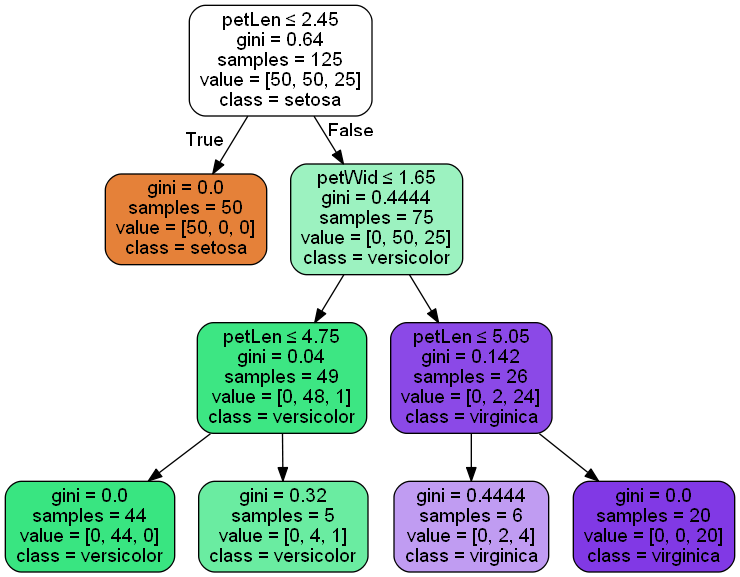

In [66]:
import pydotplus 
from IPython.display import Image 
dot_data = tree.export_graphviz(clf_gini, out_file=None, 
                         feature_names=data.columns,  
                         class_names=iris.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())  